# View fitted PCigale spectra


- Read parameters files (not the spectra file)

- Show nice plots for pressentations

- Author Sylvie Dagoret-Campagne
- Afflilation : IJCLab/IN2P3/CNRS
- Organisation : LSST-DESC
- creation date : 2024-02-08
  

In [1]:
import h5py
import pandas as pd
import numpy as np
import os
import re
import pickle 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import collections
from collections import OrderedDict
import re
import matplotlib.gridspec as gridspec

/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_80460/2047720228.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'
plt.rcParams['legend.fontsize']=  16

## imports

### fors2starlightio

In [3]:
from fors2pcigale.fors2starlightio import flux_norm

## Configuration

### fitted params

In [4]:
# current date

date = "2024-02-05"
# previous date
#date = "2023-11-27"
suptitle = f"SED-DSPS-fit ({date})"

In [5]:
input_path = "./"
input_file = output_file_h5  = f"FittedSSPspectraPcigale_{date}.hdf5"

In [6]:
fullname_input = os.path.join(input_path ,input_file) 

In [7]:
Lyman_lines = [1220., 1030. ,973.,950., 938., 930.]
Balmer_lines = [6562.791,4861.351,4340.4721,4101.740,3970.072,3889.0641,3835.3971]
Paschen_lines = [8750., 12820., 10938.0,10050., 9546.2, 9229.7,9015.3, 8862.89,8750.46,8665.02]
Brackett_lines = [40522.79, 26258.71, 21661.178, 19440., 18179.21]
Pfund_lines = [ 74599.0, 46537.8, 37405.76 , 32969.8, 30400.]
all_Hydrogen_lines = [ Lyman_lines, Balmer_lines, Paschen_lines, Brackett_lines, Pfund_lines]
Color_lines = ["purple", "blue", "green", "red","grey"]
Balmer_thres = 3645.6
Lyman_thres = 911.267
Paschen_thres = 8200.
Brackett_thres = 14580.
Pfund_lines = 22800.
all_Hydrogen_thres = [Lyman_thres , Balmer_thres, Paschen_thres, Brackett_thres, Pfund_lines]

In [8]:
wl0 = 3645.6

In [9]:
D4000_red = [4050.,4250] 
D4000_blue = [3750.,3950.]
W_BALMER = [Balmer_thres, Balmer_lines[0]]
W_LYMAN = [Lyman_thres, Lyman_lines[0]]

In [10]:
def plot_hydrogen_lines(ax):
    nth = len(all_Hydrogen_thres)
    for idx,group_lines in enumerate(all_Hydrogen_lines):
        # select only Lyman and Balmer
        if idx<2:
            color = Color_lines[idx]
            for wl_line in group_lines:
                ax.axvline(wl_line,color=color,lw=0.5)
            if idx< nth:
                ax.axvline(all_Hydrogen_thres[idx],color=color,linestyle=":")
    ax.axvspan(W_LYMAN[0],W_LYMAN[1],facecolor='green', alpha=0.5)
    ax.axvspan(W_BALMER[0],W_BALMER[1],facecolor='yellow', alpha=0.5)

In [11]:
#title="redshifts for RXJ 0054.0-2823 : long_gal = 278.66° , lat_gal = -88.60°",ax=ax);

## Read hdf5 file

In [12]:
if os.path.isfile(input_file):
    hf = h5py.File(input_file, 'r')
    list_of_groupkeys = list(hf.keys())
    # pick one key
    key_sel =  list_of_groupkeys[0]
    # pick one group
    group = hf.get(key_sel)
    #pickup all attribute names
    list_of_subgroup_keys = []
    for k in group.attrs.keys():
        list_of_subgroup_keys.append(k)
else:
    hf = None
    list_of_groupkeys = []
    list_of_subgroup_keys = []

### Sort names

In [20]:
all_nums = []
list_of_groupkeys = np.array(list_of_groupkeys)
for key in list_of_groupkeys:
    num_str = re.findall("^SPEC(.+)",key)[0]
    all_nums.append(int(num_str)) 
all_nums = np.array(all_nums)

sorted_indexes = np.argsort(all_nums)
list_of_keys_sorted = list_of_groupkeys[np.argsort(all_nums)]

In [30]:
all_z = OrderedDict()
arr_z = []
for key_sel in list_of_keys_sorted:
    group = hf.get(key_sel)
    list_of_subgroup_keys = []
    for k in group.attrs.keys():
        list_of_subgroup_keys.append(k)
    redshift = group.attrs["redshift"]
    all_z[key_sel] = redshift
    arr_z.append(redshift) 
arr_z = np.array(arr_z)

In [ ]:
assert False

## Check the colors

In [32]:
bwr_map = plt.get_cmap('bwr')
reversed_map = bwr_map.reversed() 
cNorm = colors.Normalize(0., vmax=1.)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=bwr_map)
all_colors = scalarMap.to_rgba(arr_z, alpha=1)

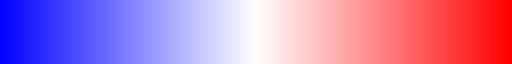

In [33]:
bwr_map

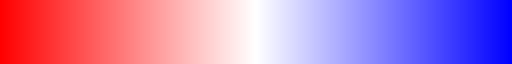

In [34]:
reversed_map

In [35]:
color_z0 = scalarMap.to_rgba(0., alpha=1)

In [36]:
color_z1 = scalarMap.to_rgba(1., alpha=1)

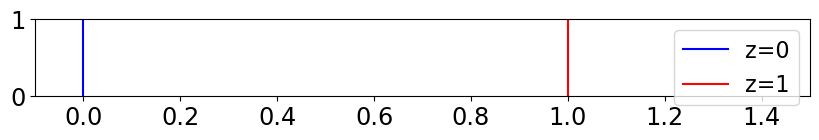

In [37]:
plt.figure(figsize=(10,1))
plt.axvline(0.,color=color_z0,label="z=0")
plt.axvline(1.,color=color_z1,label="z=1")
plt.ylim(0.,1.)
plt.xlim(-0.1,1.5)
plt.legend()

## Decode fitted parameters and plot spectra

for idx in range(N):


In [ ]:
all_x = []
all_y_nodust = []
all_y_dust = []
the_ymax= 1e-12

for idx in range(N):
    row = df.iloc[idx]
    z_obs = row["zobs"]
    list_params = row[names_fitparams].values
    dict_params = paramslist_to_dict(list_params,names_fitparams)
    x,y_nodust,y_dust = ssp_spectrum_fromparam(dict_params,z_obs)

    ymax = y_nodust.max()
    the_ymax = max(the_ymax,ymax)
    
    all_x.append(x)
    all_y_nodust.append(y_nodust) 
    all_y_dust.append(y_dust) 

ylim_max = the_ymax*2.
ylim_min = ylim_max/1e10

In [ ]:
_, ax = plt.subplots(1, 1)
__= ax.set_yscale('log') 
__= ax.set_xscale('log') 

for idx in range(N):
    ax.plot(all_x[idx],all_y_nodust[idx],color=all_colors[idx])
__= ax.set_xlim(100.,1e5)
__= ax.set_ylim(ylim_min ,ylim_max )

cbar=fig.colorbar(scalarMap , ax=ax)
cbar.ax.set_ylabel('redshift')


ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\nu(\lambda)$ (AB units - maggies)")
ax.set_title("$f_\\nu(\lambda)$ fitted spectra")
ax.grid()
plt.suptitle(suptitle)

In [ ]:
_, ax = plt.subplots(1, 1)
__= ax.set_yscale('log') 
__= ax.set_xscale('log') 

for idx in range(N):
    ax.plot(all_x[idx],all_y_nodust[idx]/all_x[idx]**2,color=all_colors[idx])
__= ax.set_xlim(100.,1e5)
__= ax.set_ylim(1e-19 ,1e-9 )


cbar=fig.colorbar(scalarMap , ax=ax)
cbar.ax.set_ylabel('redshift')

ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\lambda(\lambda)$ (AB units - maggies)")
ax.set_title("$f_\\lambda(\lambda)$ fitted spectra")
ax.grid()
plt.suptitle(suptitle)

## Plot normalized spectra

In [ ]:
all_x = []
all_y_nodust = []
all_y_dust = []
the_ymax= 1e-12
all_t = []
all_sfh = []

for idx in range(N):
    row = df.iloc[idx]
    z_obs = row["zobs"]
    list_params = row[names_fitparams].values
    dict_params = paramslist_to_dict(list_params,names_fitparams)
    x,y_nodust,y_dust = ssp_spectrum_fromparam(dict_params,z_obs)
    tarr,sfh_gal = mean_sfr(dict_params,z_obs)

    all_t.append(tarr)
    all_sfh.append(sfh_gal )

    norm_y_nodust = flux_norm(x,y_nodust,wlcenter=wl0)
    norm_y_dust = flux_norm(x,y_dust,wlcenter=wl0)

    y_nodust /=  norm_y_nodust
    y_dust /=  norm_y_dust

     
    all_x.append(x)
    all_y_nodust.append(y_nodust) 
    all_y_dust.append(y_dust) 

ylim_max = the_ymax*2.
ylim_min = ylim_max/1e10

In [ ]:
fig, ax = plt.subplots(1, 1)
__= ax.set_yscale('log') 
__= ax.set_xscale('log') 

for idx in range(N):

    norm_y_nodust = flux_norm(all_x[idx],all_y_nodust[idx],wlcenter=wl0)
   
    ax.plot(all_x[idx],all_y_nodust[idx]/norm_y_nodust,color=all_colors[idx])
__= ax.set_xlim(100.,1e5)
#__= ax.set_ylim(ylim_min ,ylim_max )
ax.set_ylim(1e-5,1e3)


cbar=fig.colorbar(scalarMap , ax=ax)
cbar.ax.set_ylabel('redshift')

ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\nu(\lambda)$ (relative flux)")
ax.set_title("$f_\\nu(\lambda)$ fitted spectra")
#ax.grid()
plot_hydrogen_lines(ax)


left, bottom, width, height = [0.45, 0.2, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
df["zobs"].plot(kind='hist', bins=30,range=(0,1.5),facecolor="b",xlabel="z_obs",
                title="redshifts for RXJ 0054.0-2823",ax=ax2);

plt.suptitle(suptitle)

## Plot Filters of LSST

In [ ]:
ps = FilterInfo()
ps.dump()

In [ ]:
plt.suptitle(suptitle)#fig, axs = plt.subplots(4, 1,figsize=(12,12),sharex=True)

fig = plt.figure(constrained_layout=True,figsize=(12,12))

gs = gridspec.GridSpec(nrows=4, ncols=1, height_ratios=[3,1,1,1],hspace=0.02)
#fig.subplots_adjust(left=0.05, bottom=0.06, right=0.95, top=0.94, wspace=0.2)         

ax = fig.add_subplot(gs[0])

for idx in range(N):

    norm_y_nodust = flux_norm(all_x[idx],all_y_nodust[idx],wlcenter=wl0)
   
    ax.plot(all_x[idx],all_y_nodust[idx]/norm_y_nodust,color=all_colors[idx])
__= ax.set_xlim(100.,2.5e4)
#__= ax.set_ylim(ylim_min ,ylim_max )


#cbar=fig.colorbar(scalarMap , ax=ax)
#cbar.ax.set_ylabel('redshift')

__= ax.set_yscale('log') 
__= ax.set_xscale('log') 

ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\nu(\lambda)$ (relative flux)")
ax.set_title("$f_\\nu(\lambda)$ fitted spectra")
ax.set_ylim(1e-5,1e3)
plot_hydrogen_lines(ax)


inset_ax = inset_axes(ax,
                    width="30%", # width = 30% of parent_bbox
                    height="30%", # height : 1 inch
                    loc=2)
df["zobs"].plot(kind='hist', bins=30,range=(0,1.5),facecolor="b",xlabel="z_obs",ylabel="",
                title="redshifts for RXJ 0054.0-2823",ax=inset_ax);
#left, bottom, width, height = [0.45, 0.2, 0.25, 0.25]
#ax2 = fig.add_axes([left, bottom, width, height])
#df["zobs"].plot(kind='hist', bins=30,range=(0,1.5),facecolor="b",xlabel="z_obs",
#                title="redshifts for RXJ 0054.0-2823",ax=ax2);

# loop on redshift
for idx,redshift in enumerate([0.,1.,2.]):

    textstr = f"z = {redshift:.1f}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    
    ax3 = fig.add_subplot(gs[1+idx], sharex=ax)
    plt.setp(ax3.get_yticklabels(), visible=False)
    ax3.text(0.05, 0.95, textstr, transform=ax3.transAxes, fontsize=14,verticalalignment='top', bbox=props)

    
    
    # loop on filters
    for index in ps.filters_indexlist:
        the_name = ps.filters_namelist[index]
        the_filt = ps.filters_transmissionlist[index]
        the_norm = ps.filters_transmissionnormlist[index]
        the_wlmean = the_filt.wave_mean
        the_color = ps.filters_colorlist[index]
        the_transmission =the_filt.transmission/the_norm
        ax3.plot(the_filt.wavelength/(1+redshift),the_transmission,color=the_color)

        if index%2 ==0:
            ax3.text(the_wlmean/(1+redshift), 0.7, the_name,horizontalalignment='center',verticalalignment='center',color=the_color,fontweight="bold")
        else:
            ax3.text(the_wlmean/(1+redshift), 0.85, the_name,horizontalalignment='center',verticalalignment='center',color=the_color,fontweight="bold")
   
    __=ax3.set_ylim(0.,1.)

plt.suptitle(suptitle)
plt.tight_layout()

## Plot SFR

In [ ]:
fig, ax = plt.subplots(1, 1)

for idx in range(N): 
    ax.plot(all_t[idx],all_sfh[idx],color=all_colors[idx])


cbar=fig.colorbar(scalarMap , ax=ax)
cbar.ax.set_ylabel('redshift')

ax.set_title("Star Formation History",fontsize=20)
ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$',fontsize=14)
ax.set_ylabel(r'${\rm SFR\ [M_{\odot}/yr]}$',fontsize=14)
ax.set_yscale('log')
ax.set_ylim(1e-3,1e3)

left, bottom, width, height = [0.5, 0.6, 0.25, 0.25]

# suppress to have a better view
ax2 = fig.add_axes([left, bottom, width, height])
df["zobs"].plot(kind='hist', bins=30,range=(0,1.5),facecolor="b",xlabel="z_obs",
                title="redshifts for RXJ 0054.0-2823",ax=ax2);

plt.suptitle(suptitle)